In [1]:
!pip install scipy==1.7.1

     |████████████████████████████████| 28.5 MB 52.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import scipy
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats.distributions import gamma
from sklearn.preprocessing import MinMaxScaler
from functools import partial
from collections import Counter

https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.data', names=['Date' ,'WSR0', 'WSR1', 'WSR2', 'WSR3', 'WSR4', 'WSR5', 'WSR6', 'WSR7', 'WSR8', 'WSR9', 'WSR10', 'WSR11', 'WSR12', 'WSR13', 'WSR14', 'WSR15', 'WSR16', 'WSR17', 'WSR18', 'WSR19', 'WSR20', 'WSR21', 'WSR22', 'WSR23', 'WSR_PK', 'WSR_AV', 'T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'T19', 'T20', 'T21', 'T22', 'T23', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85', 'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50', 'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp', 'Ozone'])
data

,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,WSR10,WSR11,WSR12,WSR13,WSR14,WSR15,WSR16,WSR17,WSR18,WSR19,WSR20,WSR21,WSR22,WSR23,WSR_PK,WSR_AV,T0,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,T20,T21,T22,T23,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,RH70,U70,V70,HT70,T50,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Ozone
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,3.7,5.5,5.1,5.4,5.4,4.7,4.3,3.5,3.5,2.9,3.2,3.2,2.8,2.6,5.5,3.1,5.2,6.1,6.1,6.1,6.1,5.6,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,18.9,18.3,17.3,16.8,16.1,15.4,14.9,14.8,15,19.1,12.5,6.7,0.11,3.83,0.14,1612,-2.3,0.3,7.18,0.12,3178.5,-15.5,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0.0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,4.2,4.5,4.5,4.3,5.5,5.1,3.8,3,2.6,3,2.2,2.3,2.5,2.8,5.5,3.4,15.1,15.3,15.6,15.6,15.9,16.2,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,22.1,20.8,19.1,18.1,17.2,16.5,16.1,16,16.2,22.4,17.8,9,0.25,-0.41,9.53,1594.5,-2.2,0.96,8.24,7.3,3172,-14.5,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0.0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,3.1,4,4.4,4.6,5.6,5.4,5.2,4.4,3.5,2.7,2.9,3.9,4.1,4.6,5.6,3.5,16.6,16.7,16.7,16.8,16.8,16.8,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22,22.1,22.2,21.3,19.8,18.6,18,18,18.2,18.3,18.4,22.2,18.7,9,0.56,0.89,10.17,1568.5,0.9,0.54,3.8,4.42,3160,-15.9,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0.0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,3.3,3.1,2.3,2.1,2.2,3.8,2.8,2.4,1.9,3.2,4.1,3.9,4.5,4.3,4.7,3.2,18.3,18.2,18.3,18.4,18.6,18.6,18.5,18.7,18.6,18.8,19,19,19.3,19.4,19.6,19.2,18.9,18.8,18.6,18.5,18.3,18.5,18.8,18.9,19.6,18.7,9.9,0.89,-0.34,8.58,1546.5,3,0.77,4.17,8.11,3145.5,-16.8,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0.0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,2.2,2,3,3,3.1,3.1,2.7,3,2.4,2.8,2.5,2.5,3.7,3.4,3.7,2.3,18.8,18.6,18.5,18.5,18.6,18.9,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,26,25.6,24.2,22.9,21.6,20,19.5,19.1,19.1,26,21.1,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.58,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,12/27/2004,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,2.8,2.8,2.8,3.4,3.9,3.8,3.5,2,1.7,1.5,1.3,1.3,1.3,1.1,3.9,1.6,2.8,2.3,1.6,1.2,1.3,1.3,1.2,1.1,3.8,7.6,10.7,12.6,13.9,14.5,14.7,14.8,14.2,12.9,11.3,9.9,8.8,7.9,7.3,7,14.8,7.7,5.5,0.33,-2.25,-1.92,1576,3.2,0.06,0.01,-3.5,3153.5,-12.4,0.07,7.93,-4.41,5800,-25.6,21.8,10295,65,0,0.0
2532,12/28/2004,1,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,4.2,4.6,4.2,4.8,5,4.7,3.7,3.6,2.7,3.1,2.1,1.8,1.6,1.1,5,2.6,7,6.9,7.1,7.6,7.7,7.7,7.7,7.8,9.4,12.4,15.5,17.3,17.9,18.4,18.3,17.6,16.9,15.8,15.4,15.1,15,14.8,15.1,15.3,18.4,12.9,5.8,0.27,-2.45,4.71,1600.5,3.4,0.1,0.97,1.86,3189,-12,0.04,5.95,-1.14,5845,-19.4,19.1,10310,15,0,0.0
2533,12/29/2004,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,2.9,3.3,3.7,3.9,3.6,3.7,3.3,3,2.3,1.3,1.2,0.8,1.6,1.8,3.9,1.9,15.3,14.8,15,14.8,14.2,14.2,14.9,15.6,17.1,18.6,19.2,19.8,20.4,20.6,19.9,20.6,20,18.9,18.2,18.1,18.5,18.7,18.4,18.2,20.6,17.7,7.5,0.79,7.57,3.13,1591,4.6,0.06,3.02,2.24,3181,-11.8,0.06,7.8,-0.64,5845,-9.6,35.2,10275,-35,0,0.0
2534,12/30/2004,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1,1.9,2,2.5,2.1,2.5,3.6,3.9,4,3.6,3.1,3.2,2.3,1.8,1.7,1.4,1.3,4,2.1,18.1,18,18,18.3,18.3,18.4,18.4,18.4,18.9,18.8,18.9,20.1,21.9,23.3,23.6,23.5,22.6,21.8,21.1,20.4,19.8,19.5,19.1,18.7,23.6,19.9,9.3,0.66,0.85,9.76,1581.5,6.7,0.02,1.1,3.4,3170.5,-10.8,0.25,7.72,-0.89,5845,-19.6,34.2,10245,-30,0.05,0.0


In [3]:
non_date_columns = [col for col in data.columns if col != 'Date']
data[non_date_columns] = data[non_date_columns].replace('?', np.nan).astype(np.float32)
data.dropna(inplace=True)

In [4]:
#subsample = data[['KI']]
subsample = data[['KI', 'TT', 'T_PK']]
subsample

,KI,TT,T_PK
0,-12.10,17.900000,19.100000
1,14.05,29.000000,22.400000
2,17.90,41.299999,22.200001
3,31.15,51.700001,19.600000
6,26.75,48.450001,15.800000
...,...,...,...
2531,-25.60,21.799999,14.800000
2532,-19.40,19.100000,18.400000
2533,-9.60,35.200001,20.600000
2534,-19.60,34.200001,23.600000


In [5]:
subsample[subsample.columns] = MinMaxScaler().fit_transform(subsample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3076: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.iloc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3041: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

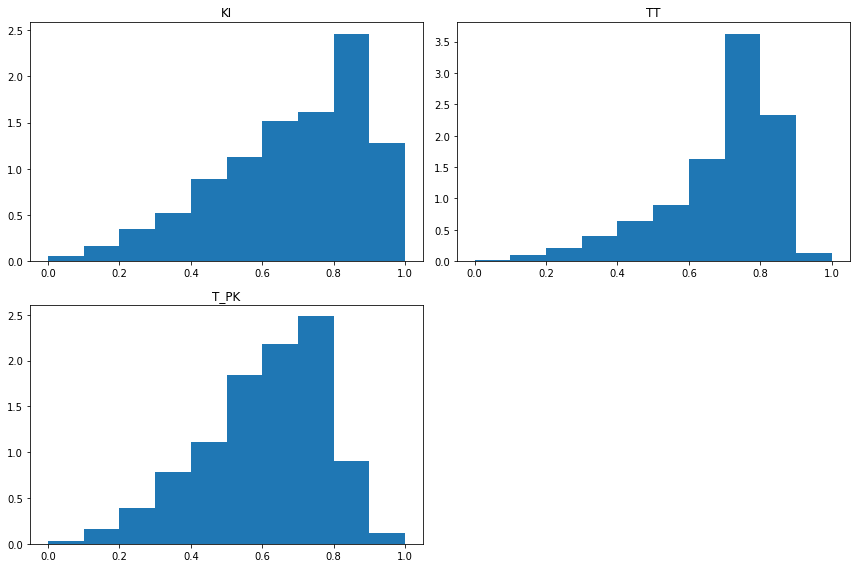

In [6]:
_ = subsample.hist(figsize=(12, 8), density = True, grid=False)
plt.tight_layout()


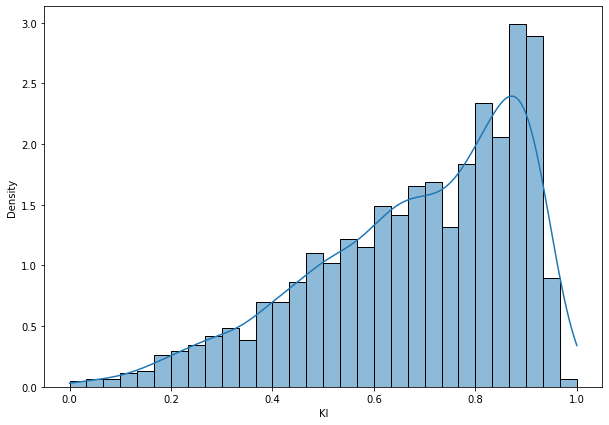

In [7]:
plt.figure(figsize=(10, 7))
sns.histplot(subsample['KI'], kde=True, bins=30, stat='density', label=f'KI')


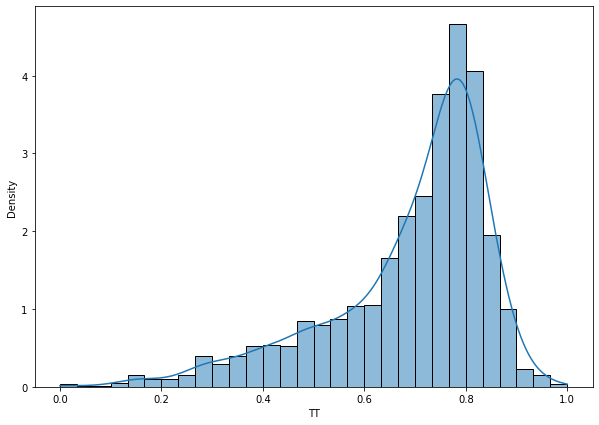

In [8]:
plt.figure(figsize=(10, 7))
sns.histplot(subsample['TT'], kde=True, bins=30, stat='density', label=f'KI')

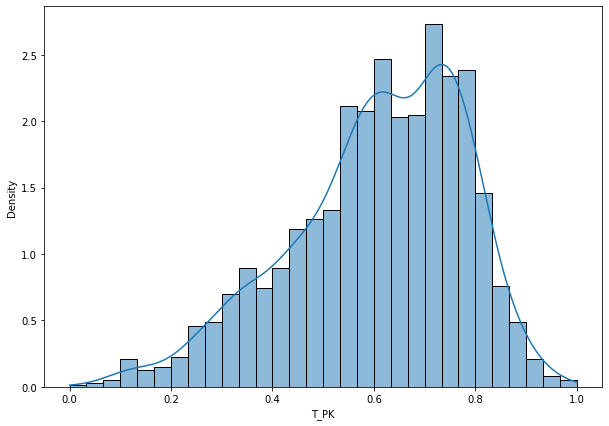

In [9]:
plt.figure(figsize=(10, 7))
sns.histplot(subsample['T_PK'], kde=True, bins=30, stat='density', label=f'KI')

count    1848.000000
mean        0.682309
std         0.204206
min         0.000000
25%         0.546582
50%         0.722785
75%         0.855823
max         1.000000
Name: KI, dtype: float64


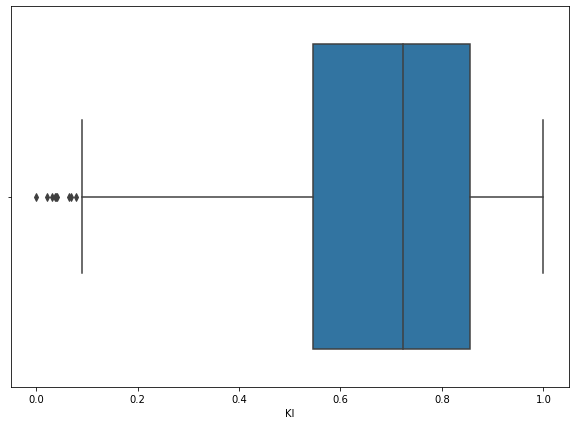

In [10]:
ki_des = subsample.KI.describe()
print(ki_des)
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x=subsample.KI)

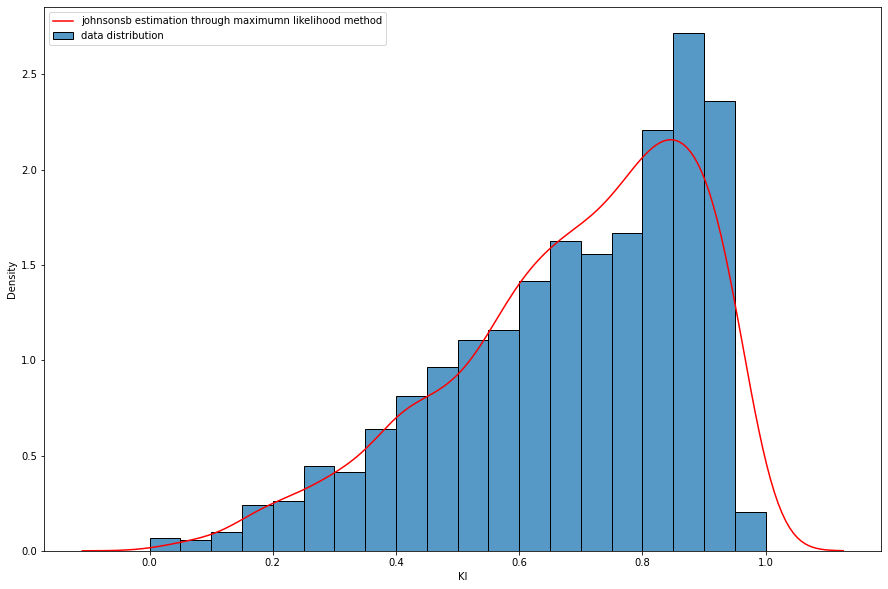

In [30]:
plt.figure(figsize=(15, 10))
sns.histplot(subsample['KI'], stat='density')
ki_params_mle = scipy.stats.johnsonsb.fit(subsample['KI'])
generated = scipy.stats.johnsonsb.rvs(*ki_params_mle, random_state=0, size=len(subsample['KI']))
sns.kdeplot([x for x in generated if 1 >= x >= 0], color='r')
plt.legend(['johnsonsb estimation through maximumn likelihood method', 'data distribution'], loc='upper left')

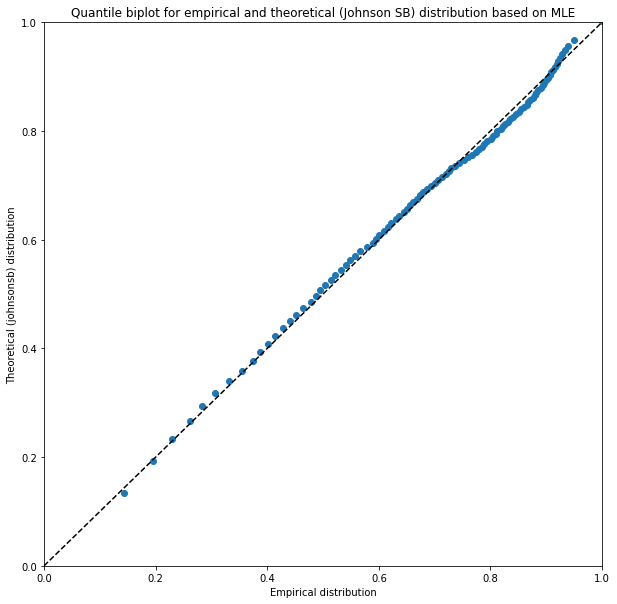

In [14]:
ki_subsample=subsample.KI
#QQ-bilot
# Plotting a quantile biplot for empirical and theoretical distribution
x = np.linspace(np.min(ki_subsample), np.max(ki_subsample))
# Calculation of quantiles
percs = np.linspace(0, 100, 100)

qn_first = np.percentile(ki_subsample, percs)
qn_weib = st.johnsonsb.ppf(percs / 100.0, *ki_params_mle)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_weib, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.title("Quantile biplot for empirical and theoretical (Johnson SB) distribution based on MLE")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (johnsonsb) distribution')

plt.show()

In [31]:
# Determination of the parameters of the distribution
x = np.linspace(np.min(subsample['KI']), np.max(subsample['KI']))
print("Results of statistical tests for 'KI' (maximum likelihood method)")
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = st.kstest(subsample['KI'], 'johnsonsb', ki_params_mle, N=100)
#Calculation of the and chi-square
chi2 = st.chisquare(subsample['KI'])
print(ks)
print(chi2)

Results of statistical tests for 'KI' (maximum likelihood method)
KstestResult(statistic=0.03949926922842317, pvalue=0.00609080734843864)
Power_divergenceResult(statistic=112.881805, pvalue=1.0)


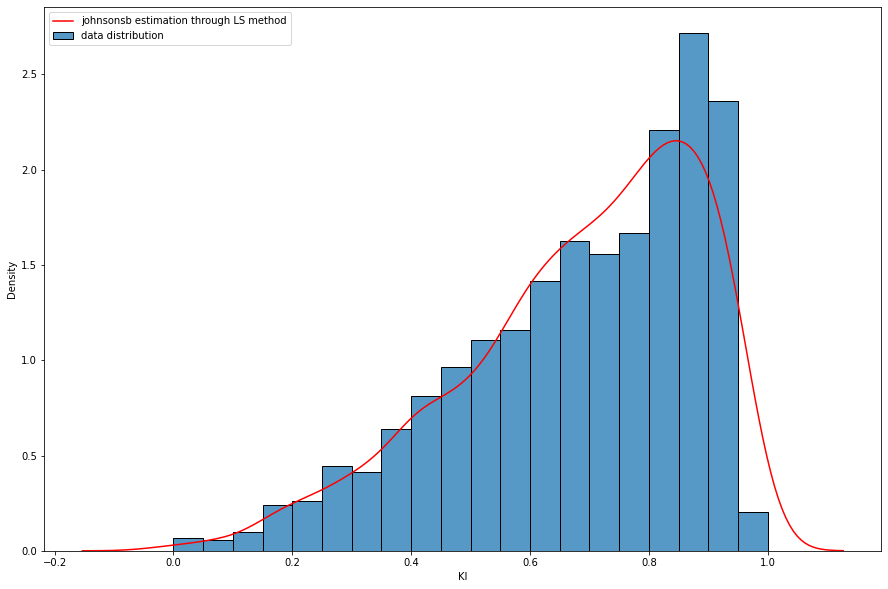

In [32]:
plt.figure(figsize=(15, 10))
sns.histplot(subsample['KI'], stat='density')
ki_params_mm = scipy.stats.johnsonsb.fit(subsample['KI'])
generated = scipy.stats.johnsonsb.rvs(*ki_params_mm, random_state=0, size=len(subsample['KI']))
sns.kdeplot(generated, color='r')
plt.legend(['johnsonsb estimation through LS method', 'data distribution'], loc='upper left')

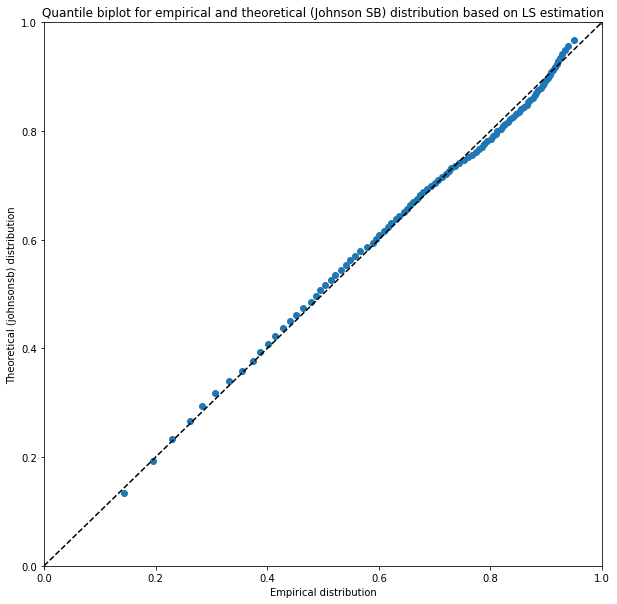

In [ ]:
#QQ-bilot
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
x = np.linspace(np.min(ki_subsample), np.max(ki_subsample))
# Calculation of quantiles
percs = np.linspace(0, 100, 100)

qn_first = np.percentile(ki_subsample, percs)
qn_weib = st.johnsonsb.ppf(percs / 100.0, *ki_params_mm)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_weib, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Quantile biplot for empirical and theoretical (Johnson SB) distribution based on LS estimation")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (johnsonsb) distribution')

plt.show()

In [22]:
# Determination of the parameters of the distribution
x = np.linspace(np.min(subsample['KI']), np.max(subsample['KI']))
print("Results of statistical tests for 'KI' (LS method)")
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = st.kstest(subsample['KI'], 'johnsonsb', ki_params_mm, N=100)
#Calculation of the and chi-square
chi2 = st.chisquare(subsample['KI'])
print(ks)
print(chi2)

Results of statistical tests for 'KI' (LS method)
KstestResult(statistic=0.03949926922842317, pvalue=0.00609080734843864)
Power_divergenceResult(statistic=112.881805, pvalue=1.0)


count    1848.000000
mean        0.690039
std         0.158931
min         0.000000
25%         0.622383
50%         0.742960
75%         0.797834
max         1.000000
Name: TT, dtype: float64


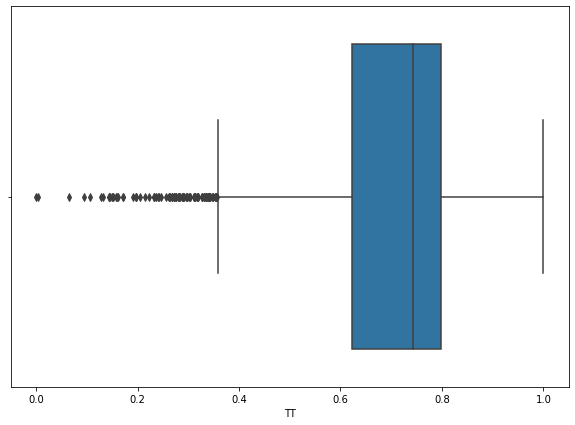

In [ ]:
tt_des = subsample.TT.describe()
print(tt_des)
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x=subsample.TT)

MLE ESTIMATION

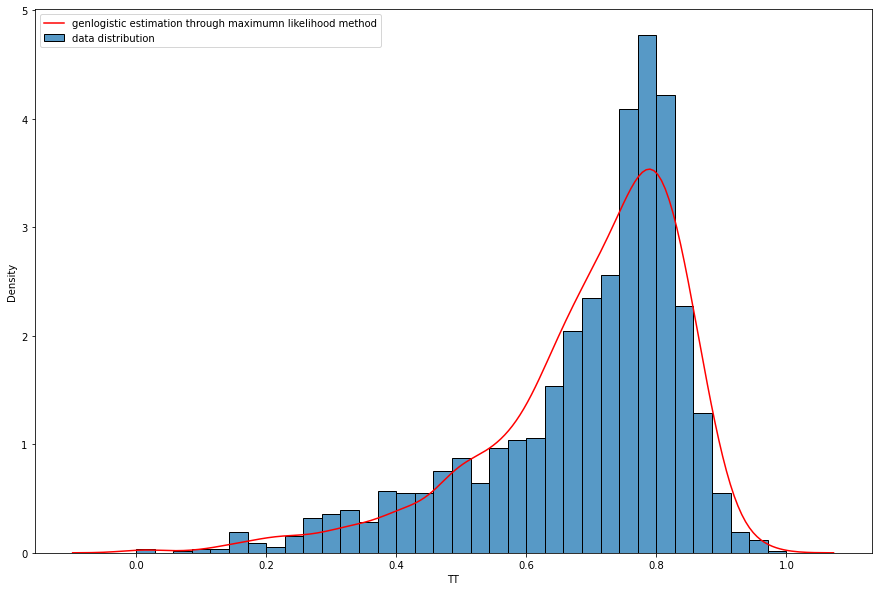

In [17]:
plt.figure(figsize=(15, 10))
sns.histplot(subsample['TT'], stat='density')
tt_params_mle = st.genlogistic.fit(subsample['TT'])
generated = scipy.stats.genlogistic.rvs(*tt_params_mle, random_state=0, size=len(subsample['TT']))
sns.kdeplot([x for x in generated if 1 >= x >= 0], color='r')
plt.legend(['genlogistic estimation through maximumn likelihood method', 'data distribution'], loc='upper left')


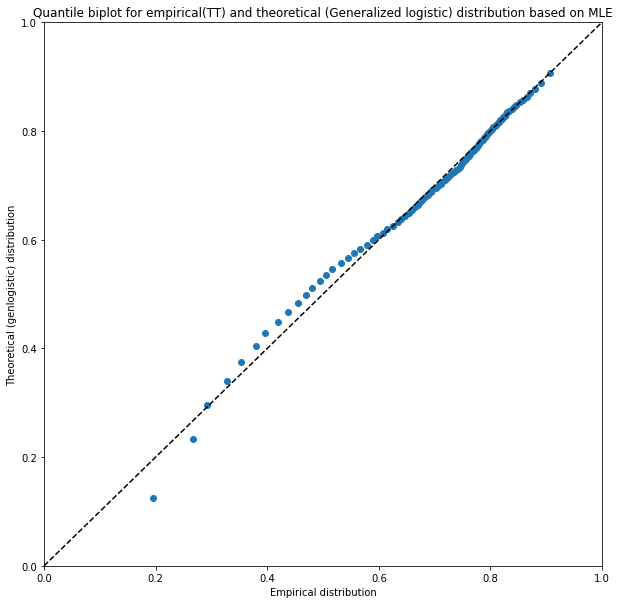

In [29]:
#QQ-bilot
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
x = np.linspace(np.min(subsample['TT']), np.max(subsample['TT']))
# Calculation of quantiles
percs = np.linspace(0, 100, 100)

qn_first = np.percentile(subsample['TT'], percs)
qn_weib = st.genlogistic.ppf(percs / 100.0, *tt_params_mle)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_weib, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Quantile biplot for empirical(TT) and theoretical (Generalized logistic) distribution based on MLE")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (genlogistic) distribution')

plt.show()

In [23]:
# Determination of the parameters of the distribution
x = np.linspace(np.min(subsample['TT']), np.max(subsample['TT']))
# The distribution parameters are determined using the fit function based on the maximum likelihood method
#pdf = st.genlogistic.pdf(x, *tt_params_mle)
print("Results of statistical tests for 'TT' (maximum likelihood method)")
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = st.kstest(subsample['TT'], 'genlogistic', tt_params_mle, N=100)
chi2 = st.chisquare(subsample['TT'])
print(ks)
print(chi2)

Results of statistical tests for 'TT' (maximum likelihood method)
KstestResult(statistic=0.03769596496291727, pvalue=0.010203910042989801)
Power_divergenceResult(statistic=67.60989, pvalue=1.0)


LS ESTIMATION

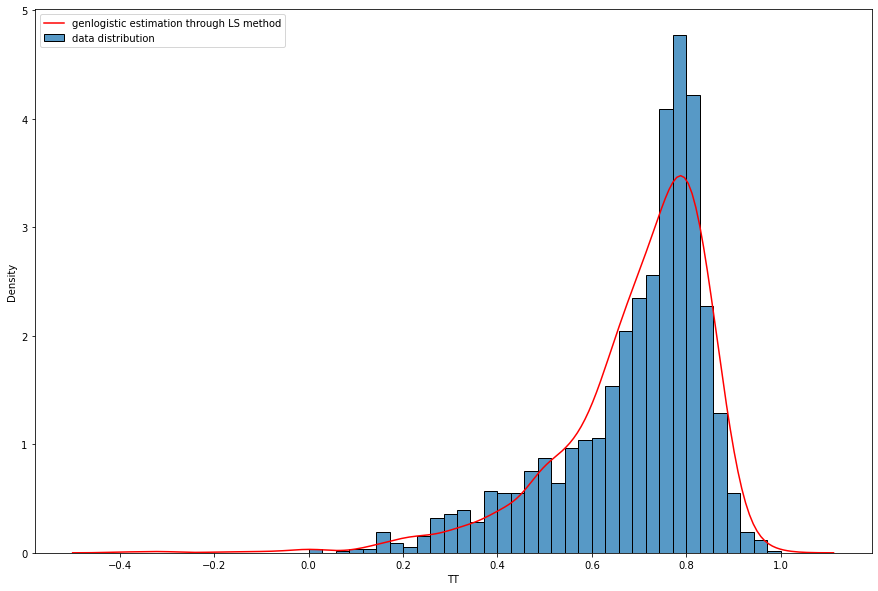

In [18]:
plt.figure(figsize=(15, 10))
sns.histplot(subsample['TT'], stat='density')
tt_params_mm = scipy.stats.genlogistic.fit(subsample['TT'])
generated = scipy.stats.genlogistic.rvs(*tt_params_mm, random_state=0, size=len(subsample['TT']))
sns.kdeplot(generated, color='r')
plt.legend(['genlogistic estimation through LS method', 'data distribution'], loc='upper left')

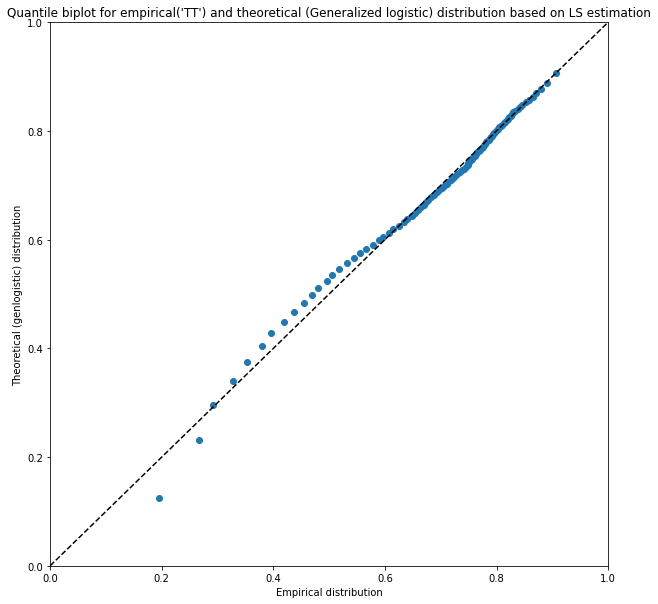

In [ ]:
#QQ-bilot
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
x = np.linspace(np.min(subsample['TT']), np.max(subsample['TT']))
# Calculation of quantiles
percs = np.linspace(0, 100, 100)

qn_first = np.percentile(subsample['TT'], percs)
qn_weib = st.genlogistic.ppf(percs / 100.0, *tt_params_mm)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_weib, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Quantile biplot for empirical('TT') and theoretical (Generalized logistic) distribution based on LS estimation")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (genlogistic) distribution')

plt.show()

In [24]:
# Determination of the parameters of the distribution
x = np.linspace(np.min(subsample['TT']), np.max(subsample['TT']))
# The distribution parameters are determined using the fit function based on the maximum likelihood method
#pdf = st.genlogistic.pdf(x, *tt_params_mle)
print("Results of statistical tests for 'TT' (LS method)")
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = st.kstest(subsample['TT'], 'genlogistic', tt_params_mm, N=100)
chi2 = st.chisquare(subsample['TT'])
print(ks)
print(chi2)

Results of statistical tests for 'TT' (LS method)
KstestResult(statistic=0.03769596496291727, pvalue=0.010203910042989801)
Power_divergenceResult(statistic=67.60989, pvalue=1.0)


count    1848.000000
mean        0.606307
std         0.171896
min         0.000000
25%         0.501253
50%         0.626566
75%         0.736842
max         1.000000
Name: T_PK, dtype: float64


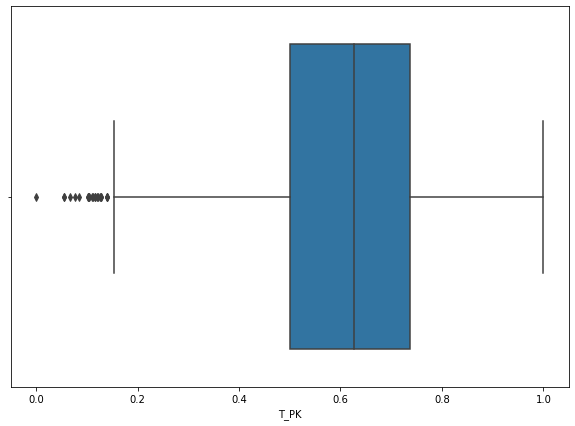

In [ ]:
t_pk_des = subsample.T_PK.describe()
print(t_pk_des)
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x=subsample.T_PK)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


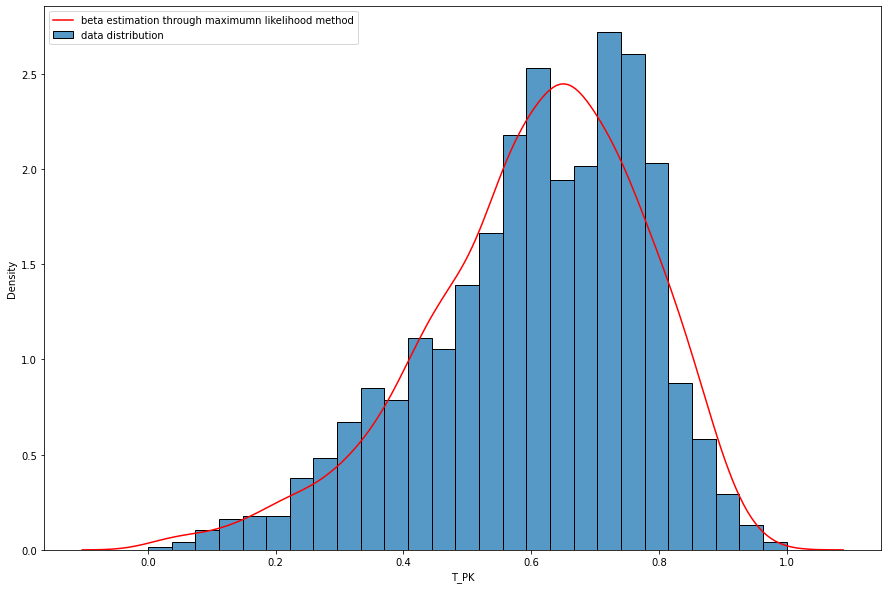

In [19]:
plt.figure(figsize=(15, 10))
sns.histplot(subsample['T_PK'], stat='density')
t_pk_params_mle = scipy.stats.beta.fit(subsample['T_PK'])
generated = scipy.stats.beta.rvs(*t_pk_params_mle, random_state=0, size=len(subsample['T_PK']))
sns.kdeplot([x for x in generated if 1 >= x >= 0], color='r')
plt.legend(['beta estimation through maximumn likelihood method', 'data distribution'], loc='upper left')

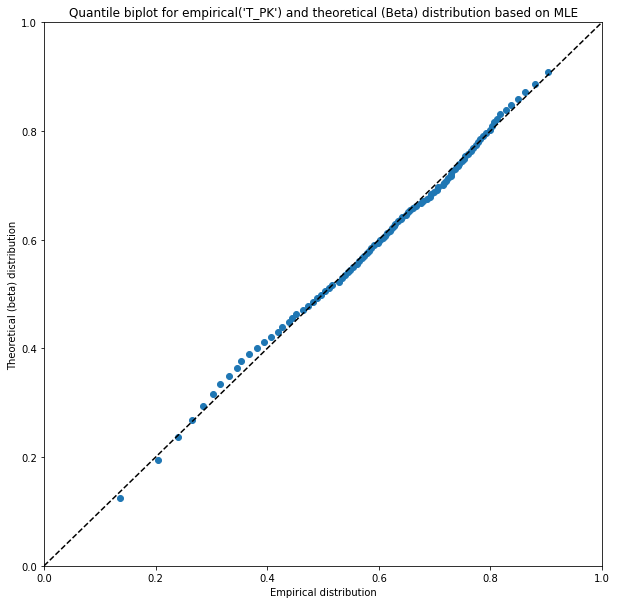

In [26]:
#QQ-bilot
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
x = np.linspace(np.min(subsample['T_PK']), np.max(subsample['T_PK']))
# Calculation of quantiles
percs = np.linspace(0, 100, 100)

qn_first = np.percentile(subsample['T_PK'], percs)
qn_weib = st.beta.ppf(percs / 100.0, *t_pk_params_mle)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_weib, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Quantile biplot for empirical('T_PK') and theoretical (Beta) distribution based on MLE")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (beta) distribution')

plt.show()

In [27]:
# Determination of the parameters of the distribution
x = np.linspace(np.min(subsample['T_PK']), np.max(subsample['T_PK']))
print("Results of statistical tests for 'T_PK' (maximum likelihood method)")
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = st.kstest(subsample['T_PK'], 'beta', t_pk_params_mle, N=100)
chi2 = st.chisquare(subsample['T_PK'])
print(ks)
print(chi2)

Results of statistical tests for 'T_PK' (maximum likelihood method)
KstestResult(statistic=0.03507094061835425, pvalue=0.020714739597932613)
Power_divergenceResult(statistic=90.01332, pvalue=1.0)


/usr/local/lib/python3.7/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


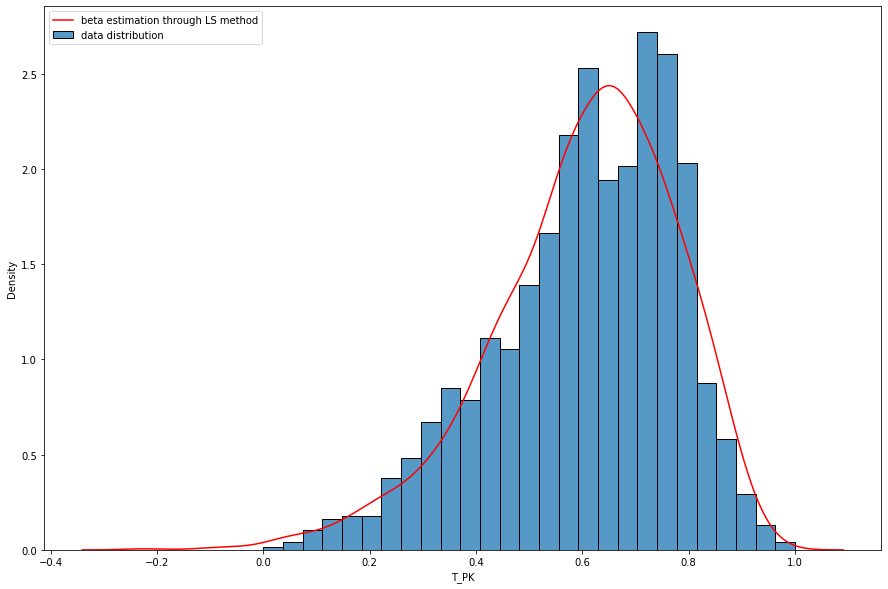

In [20]:
plt.figure(figsize=(15, 10))
sns.histplot(subsample['T_PK'], stat='density')
t_pk_params_mm = scipy.stats.beta.fit(subsample['T_PK'])
generated = scipy.stats.beta.rvs(*t_pk_params_mm, random_state=0, size=len(subsample['T_PK']))
sns.kdeplot(generated, color='r')
plt.legend(['beta estimation through LS method', 'data distribution'], loc='upper left')

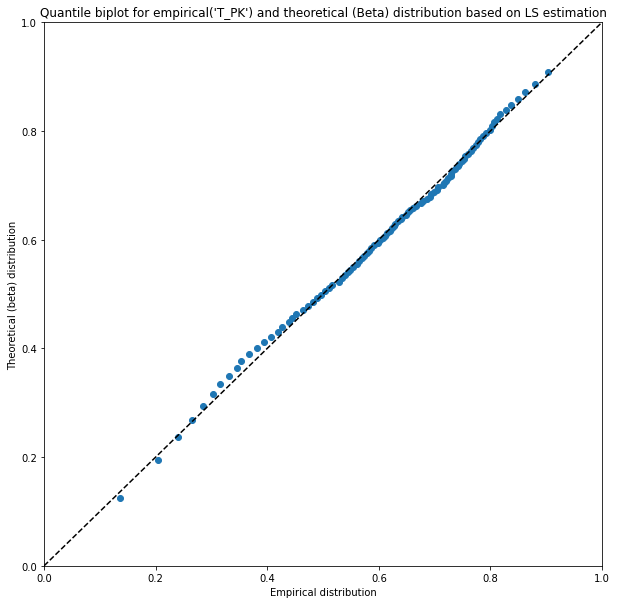

In [ ]:
#QQ-bilot
# Plotting a quantile biplot for empirical and theoretical (lognormal) distribution
x = np.linspace(np.min(subsample['T_PK']), np.max(subsample['T_PK']))
# Calculation of quantiles
percs = np.linspace(0, 100, 100)

qn_first = np.percentile(subsample['T_PK'], percs)
qn_weib = st.beta.ppf(percs / 100.0, *t_pk_params_mm)

# Building a quantile biplot
plt.figure(figsize=(10, 10))
plt.plot(qn_first, qn_weib, ls="", marker="o", markersize=6)
plt.plot(x, x, color="k", ls="--")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title("Quantile biplot for empirical('T_PK') and theoretical (Beta) distribution based on LS estimation")
plt.xlabel(f'Empirical distribution')
plt.ylabel('Theoretical (beta) distribution')

plt.show()

In [28]:
# Determination of the parameters of the distribution
x = np.linspace(np.min(subsample['T_PK']), np.max(subsample['T_PK']))
print("Results of statistical tests for 'T_PK' (LS method)")
# Calculation of the Kolmogorov-Smirnov test and chi-square
ks = st.kstest(subsample['T_PK'], 'beta', t_pk_params_mm, N=100)
chi2 = st.chisquare(subsample['T_PK'])
print(ks)
print(chi2)

Results of statistical tests for 'T_PK' (LS method)
KstestResult(statistic=0.03507094061835425, pvalue=0.020714739597932613)
Power_divergenceResult(statistic=90.01332, pvalue=1.0)
